## MNIST Classification with DNN: Regularization & Learning Rate Scheduling

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt



In [3]:

(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()


In [4]:

# Normalize pixel values to [0, 1]
train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0

# Flatten 28x28 images to vectors of size 784
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))


In [5]:

# -----------------------------
# Model Training Function
# -----------------------------
def compile_and_train(model, model_name="Model"):
    
    optimizer = keras.optimizers.AdamW(learning_rate=0.001)

    early_stopping = keras.callbacks.EarlyStopping(
        monitor="val_loss", patience=3, restore_best_weights=True
    )

    reduce_lr = keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=3, min_lr=1e-6, verbose=1
    )

    model.compile(
        optimizer=optimizer,
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )

    history = model.fit(
        train_images,
        train_labels,
        validation_split=0.2,
        epochs=50,
        batch_size=128,
        callbacks=[reduce_lr, early_stopping],
        verbose=2,
    )

    test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
    print(f"{model_name} Evaluation -> Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}\n")

    return history, test_accuracy, test_loss


In [6]:

# -----------------------------
# Model Definitions
# -----------------------------

# Model 1: Simple feedforward network with L2 regularization
model_1 = keras.Sequential([
    keras.layers.InputLayer(input_shape=(784,)),
    keras.layers.Dense(512, activation="relu",
                       kernel_regularizer=keras.regularizers.l2(1e-5)),
    keras.layers.Dense(128, activation="relu",
                       kernel_regularizer=keras.regularizers.l2(1e-5)),
    keras.layers.Dense(10, activation="softmax"),
])


In [7]:

# Model 2: Enhanced regularization with Gaussian Noise, L1/L2 regularization,
# Batch Normalization, and Dropout for better generalization
model_2 = keras.Sequential([
    keras.layers.InputLayer(input_shape=(784,)),
    keras.layers.GaussianNoise(0.1),

    keras.layers.Dense(512, kernel_regularizer=keras.regularizers.l1(1e-5)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(128, kernel_regularizer=keras.regularizers.l2(1e-5)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dropout(0.1),

    keras.layers.Dense(10, activation="softmax"),
])


In [8]:

# -----------------------------
# Train Models
# -----------------------------
history_1, acc_1, loss_1 = compile_and_train(model_1, model_name="Model 1 (L2 Regularization)")
history_2, acc_2, loss_2 = compile_and_train(model_2, model_name="Model 2 (Advanced Regularization)")


Epoch 1/50
375/375 - 13s - 34ms/step - accuracy: 0.9231 - loss: 0.2739 - val_accuracy: 0.9621 - val_loss: 0.1400 - learning_rate: 1.0000e-03
Epoch 2/50
375/375 - 8s - 21ms/step - accuracy: 0.9705 - loss: 0.1068 - val_accuracy: 0.9720 - val_loss: 0.1005 - learning_rate: 1.0000e-03
Epoch 3/50
375/375 - 8s - 21ms/step - accuracy: 0.9813 - loss: 0.0716 - val_accuracy: 0.9732 - val_loss: 0.0986 - learning_rate: 1.0000e-03
Epoch 4/50
375/375 - 8s - 22ms/step - accuracy: 0.9869 - loss: 0.0532 - val_accuracy: 0.9743 - val_loss: 0.0971 - learning_rate: 1.0000e-03
Epoch 5/50
375/375 - 8s - 22ms/step - accuracy: 0.9910 - loss: 0.0401 - val_accuracy: 0.9753 - val_loss: 0.0940 - learning_rate: 1.0000e-03
Epoch 6/50
375/375 - 7s - 19ms/step - accuracy: 0.9927 - loss: 0.0343 - val_accuracy: 0.9748 - val_loss: 0.0987 - learning_rate: 1.0000e-03
Epoch 7/50
375/375 - 8s - 20ms/step - accuracy: 0.9943 - loss: 0.0305 - val_accuracy: 0.9783 - val_loss: 0.0912 - learning_rate: 1.0000e-03
Epoch 8/50
375/375 

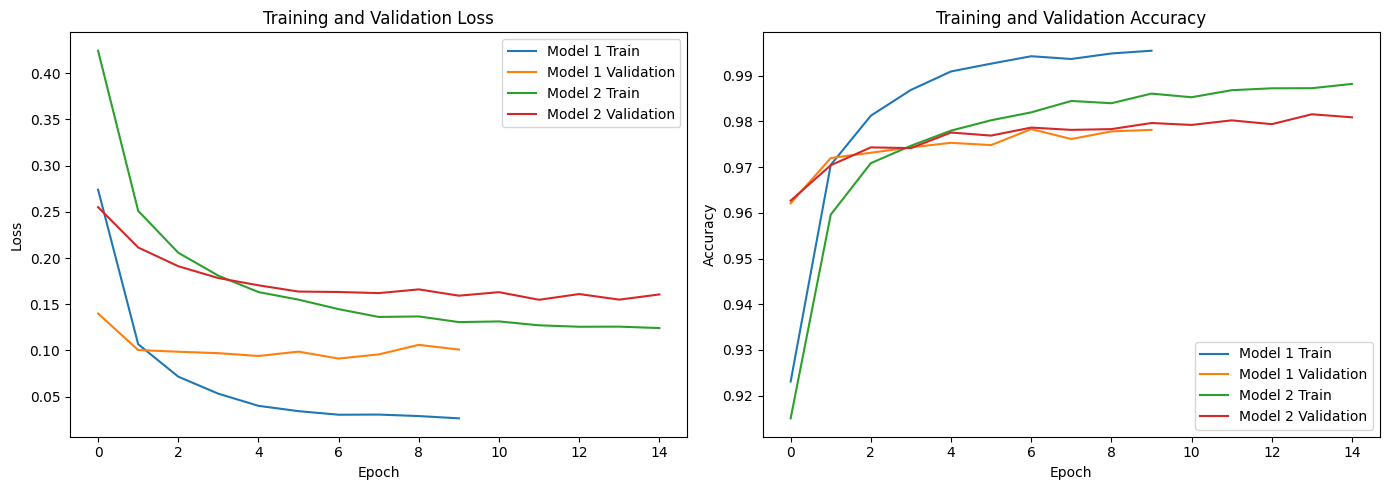

Final Test Results Summary:
Model 1 (L2 Regularization)   - Accuracy: 0.9782, Loss: 0.0874
Model 2 (Advanced Regularization) - Accuracy: 0.9828, Loss: 0.1453


In [9]:

# -----------------------------
# Visualization: Loss & Accuracy Curves
# -----------------------------
def plot_training_history(histories, model_names):
    
    plt.figure(figsize=(14, 5))

    # Plot Loss
    plt.subplot(1, 2, 1)
    for history, name in zip(histories, model_names):
        plt.plot(history.history["loss"], label=f"{name} Train")
        plt.plot(history.history["val_loss"], label=f"{name} Validation")
    plt.title("Training and Validation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    for history, name in zip(histories, model_names):
        plt.plot(history.history["accuracy"], label=f"{name} Train")
        plt.plot(history.history["val_accuracy"], label=f"{name} Validation")
    plt.title("Training and Validation Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_history([history_1, history_2], ["Model 1", "Model 2"])

# -----------------------------
# Summary of Results
# -----------------------------
print("Final Test Results Summary:")
print(f"Model 1 (L2 Regularization)   - Accuracy: {acc_1:.4f}, Loss: {loss_1:.4f}")
print(f"Model 2 (Advanced Regularization) - Accuracy: {acc_2:.4f}, Loss: {loss_2:.4f}")
